# 第 9 周
3220190783 陈子康

GitHub 地址：https://github.com/czyczk/data-mining-course

本次作业使用 Video Game Sales 数据集。

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import operator
import collections
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Lib config
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

## 1. 导入数据集

In [3]:
# Oakland crime datasets
data_vgs = pd.read_csv('../Datasets/Video_Game_Sales/vgsales.csv')

## 2. 市场分析
数据集已按照全球销量进行排序，在其中选出销量前 100 的条目，分别对游戏系列名（手动关键词 + 名称前 2 个单词）、类型、发布平台、发行商进行统计。

In [4]:
data_vgs_copy = data_vgs.copy(deep = True)

class SeriesName:
    def __init__(self, name, alternative_name = None):
        self.__name = name
        self.__alternative_name = alternative_name
    
    @property
    def name(self): return self.__name
    
    @property
    def alternative_name(self): return self.__alternative_name

col_est_series_name = []
series_name_candidates = [
    SeriesName('Wii Sports'),
#     SeriesName('Super Mario Bros.'),
#     SeriesName('Super Mario World'),
#     SeriesName('Super Mario Land'),
#     SeriesName('Super Smash Bros.'),
    SeriesName('Super Mario'),
    SeriesName('Mario Kart'),
    SeriesName('Mario Party'),
    SeriesName('Pokemon', 'Pokémon'),
    SeriesName('Tetris'),
    SeriesName('Wii Fit'),
    SeriesName('Kinect'),
    SeriesName('Grand Theft Auto'),
    SeriesName('Brain Age'),
    SeriesName('Gran Turismo'),
    SeriesName('Call of Duty'),
    SeriesName('Animal Crossing'),
    SeriesName('Halo'),
    SeriesName('Just Dance'),
    SeriesName('Final Fantasy'),
    SeriesName('Minecraft'),
    SeriesName('The Elder Scrolls'),
    SeriesName('FIFA'),
    SeriesName('Wii Party'),
    SeriesName('The Sims'),
    SeriesName('GoldenEye'),
    SeriesName('The Legend of Zelda'),
    SeriesName('Battlefield')
]

for i, entry in data_vgs_copy.iterrows():
    name = entry['Name']
    is_series_name_applied = False
    for series_name_candidate in series_name_candidates:
        if series_name_candidate.name in name or \
            (series_name_candidate.alternative_name is not None and series_name_candidate.alternative_name in name):
            col_est_series_name.append(series_name_candidate.name)
            is_series_name_applied = True
            break
    
    if not is_series_name_applied:
        col_est_series_name.append(' '.join(entry['Name'].split()[:2]))

data_vgs_copy['Est_Series_Name'] = pd.Series(col_est_series_name, index = data_vgs_copy.index)

统计系列名的频数。

In [5]:
def calc_freq(dataframe, col_name, prune_trivial = True, freq_threshold = 2):
    '''
    Calc the frequency for the specified column name.
    '''
    freq_dict = {}
    freq_other = None
    
    for i, entry in dataframe.iterrows():
        col_value = entry[col_name]
        if col_value in freq_dict:
            freq_dict[col_value] += 1
        else:
            freq_dict[col_value] = 1
    
    if prune_trivial:
        # Mark trivial entries (freq < freq_threshold) as 'Other'
        freq_other = 0
        trivial_names = []
        for k, v in freq_dict.items():
            if v < freq_threshold:
                freq_other += 1
                trivial_names.append(k)
        for name in trivial_names:
            freq_dict.pop(name)
    
    return freq_dict, freq_other

In [6]:
freq_series_name, freq_series_name_other = calc_freq(data_vgs_copy[:100], 'Est_Series_Name')
# Sort the dict in reverse order and append the 'Other' part
freq_series_name = collections.OrderedDict(sorted(freq_series_name.items(), key = lambda it: it[1], reverse = True))
freq_series_name['Other'] = freq_series_name_other

In [7]:
print('销量前 100 系列名：')
for entry in freq_series_name.items():
    print(entry)

销量前 100 系列名：
('Super Mario', 16)
('Call of Duty', 14)
('Pokemon', 12)
('Grand Theft Auto', 9)
('Gran Turismo', 5)
('Mario Kart', 4)
('Halo', 4)
('Final Fantasy', 3)
('Wii Sports', 2)
('Wii Fit', 2)
('Brain Age', 2)
('Super Smash', 2)
('Animal Crossing', 2)
('Just Dance', 2)
('Mario Party', 2)
('FIFA', 2)
('Other', 17)


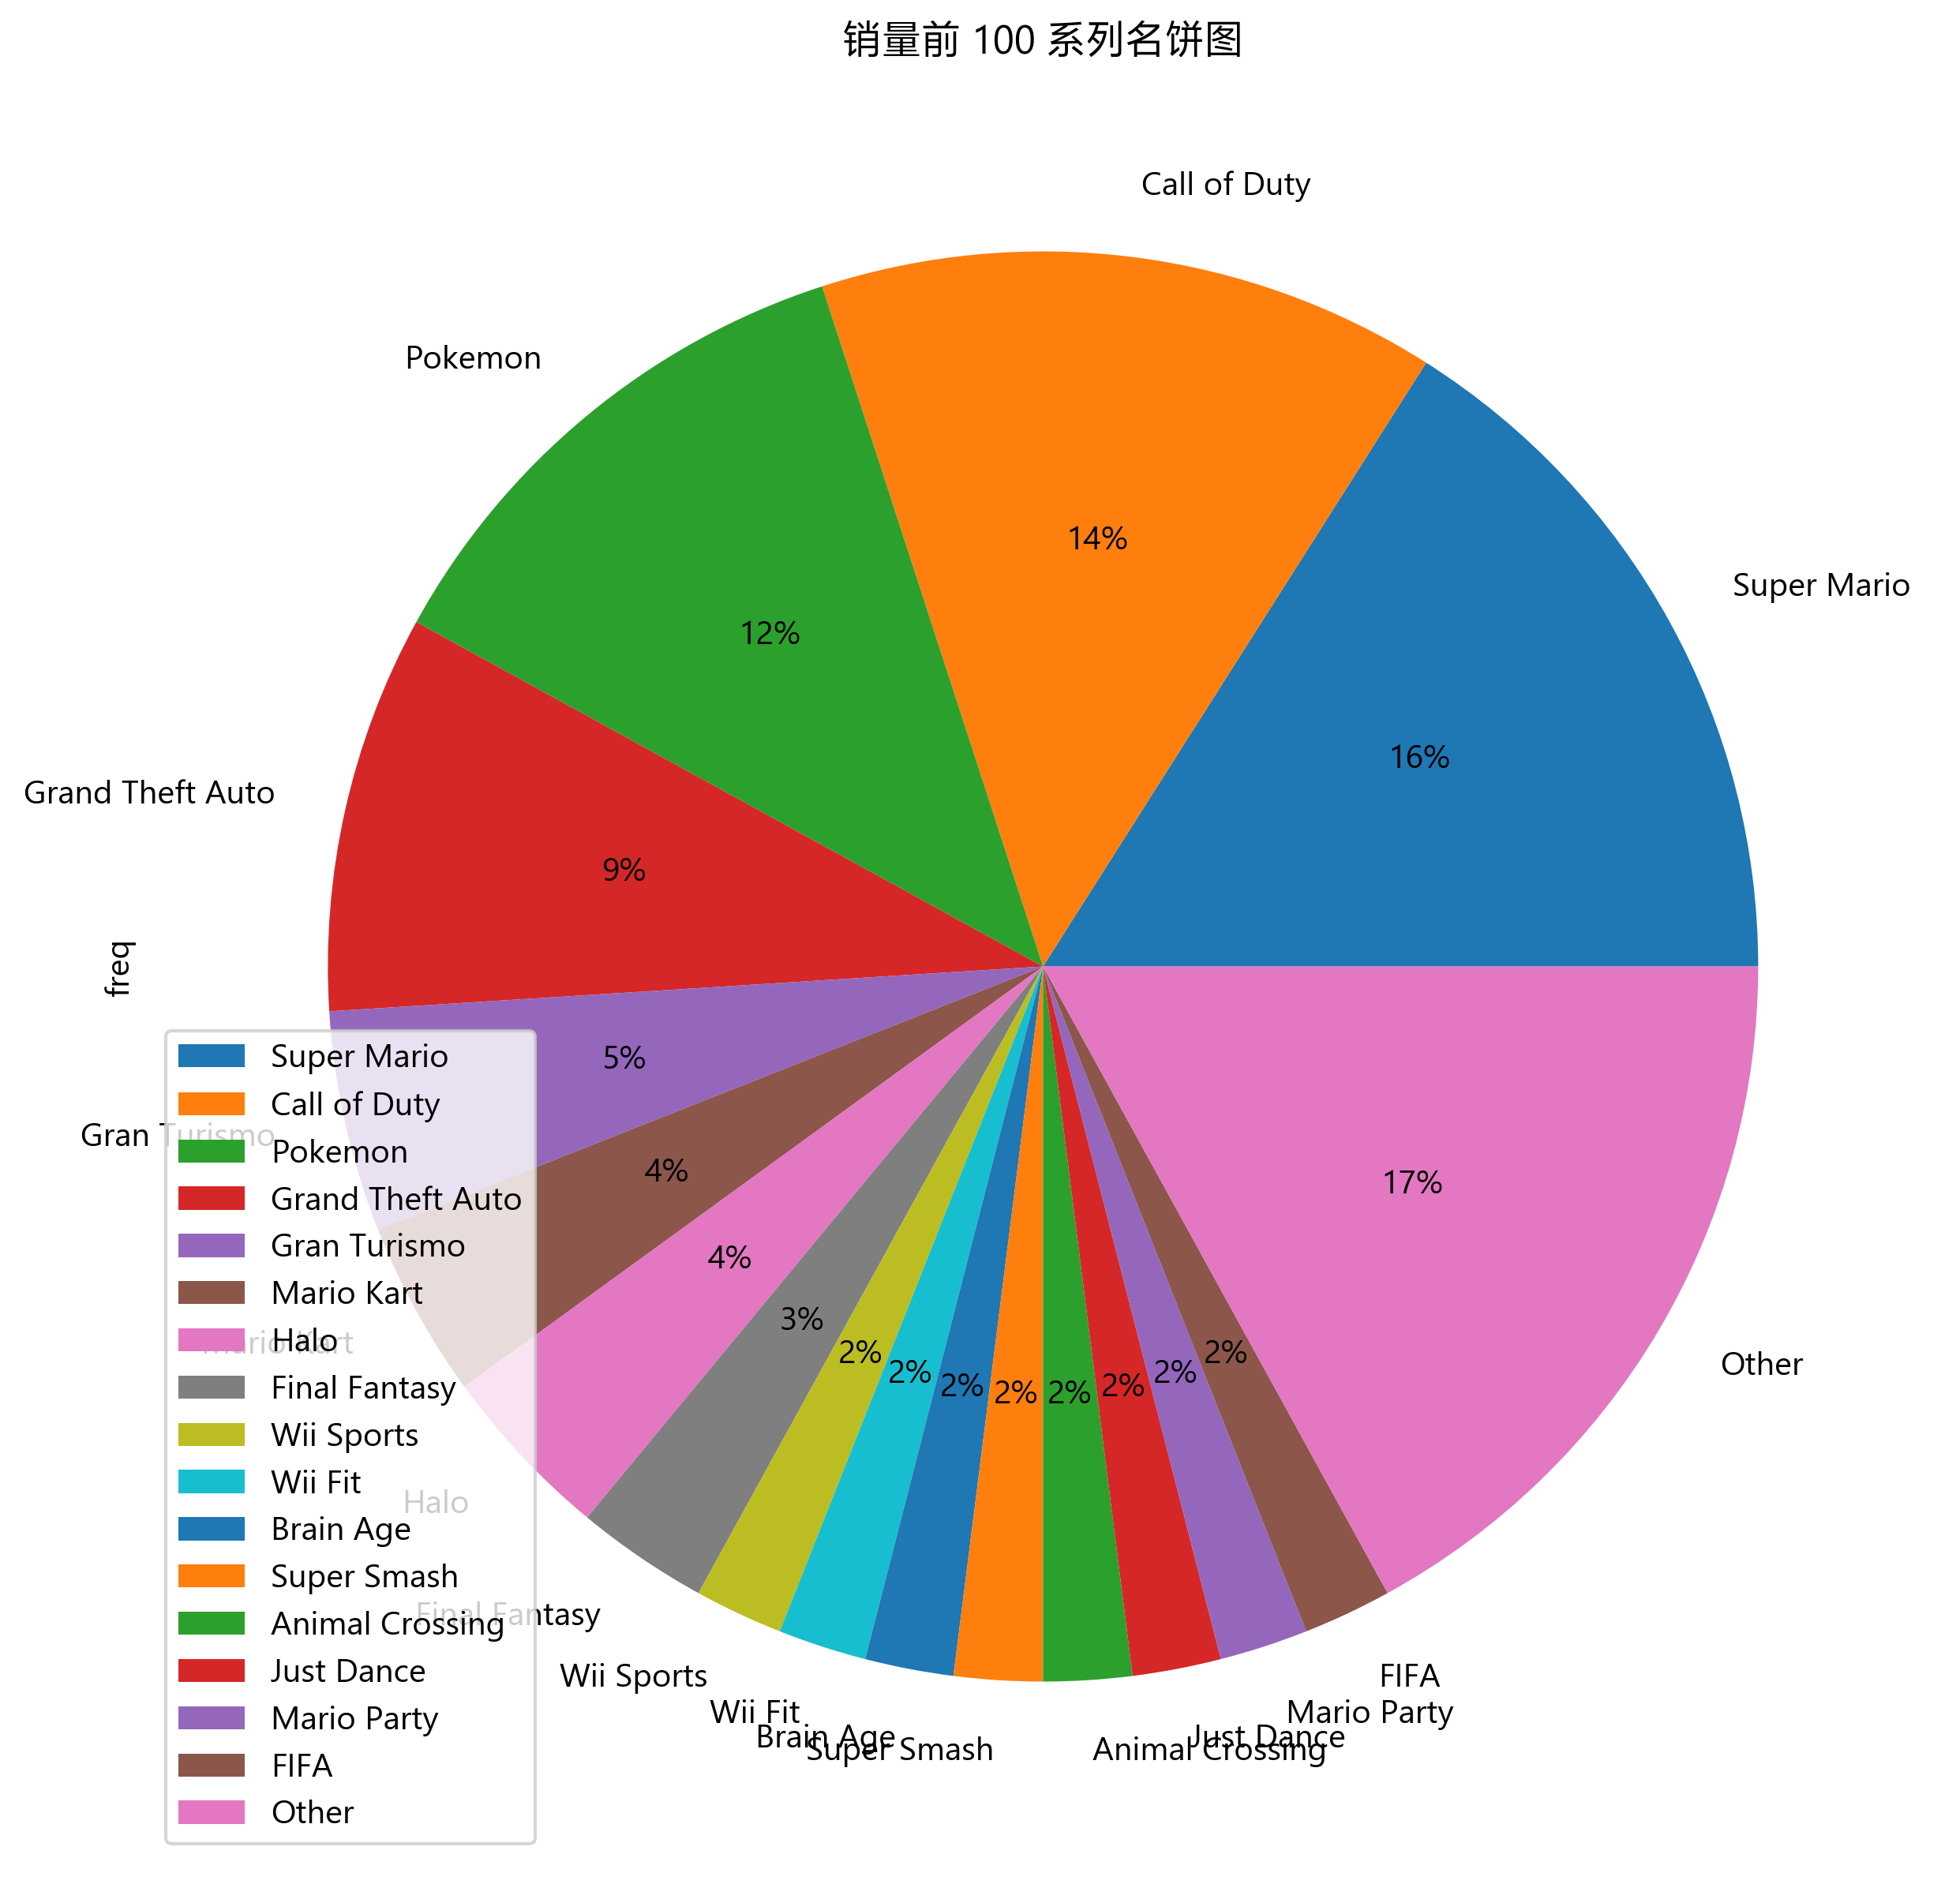

In [8]:
freq_series_name_for_pie = pd.DataFrame({'freq': list(freq_series_name.values())}, index = freq_series_name.keys())
plot = freq_series_name_for_pie.plot.pie(y = 'freq', figsize = (10, 10), title = '销量前 100 系列名饼图', autopct='%1.0f%%')
plot.legend(loc = 'lower left')

统计类型的频数。

In [9]:
freq_genre, _ = calc_freq(data_vgs_copy[:100], 'Genre', False)

# Sort the dict in reverse order
freq_genre = collections.OrderedDict(sorted(freq_genre.items(), key = lambda it: it[1], reverse = True))

In [10]:
print('销量前 100 类型：')
for entry in freq_genre.items():
    print(entry)

销量前 100 类型：
('Shooter', 22)
('Platform', 16)
('Role-Playing', 15)
('Action', 12)
('Racing', 10)
('Misc', 9)
('Sports', 6)
('Simulation', 4)
('Puzzle', 3)
('Fighting', 2)
('Adventure', 1)


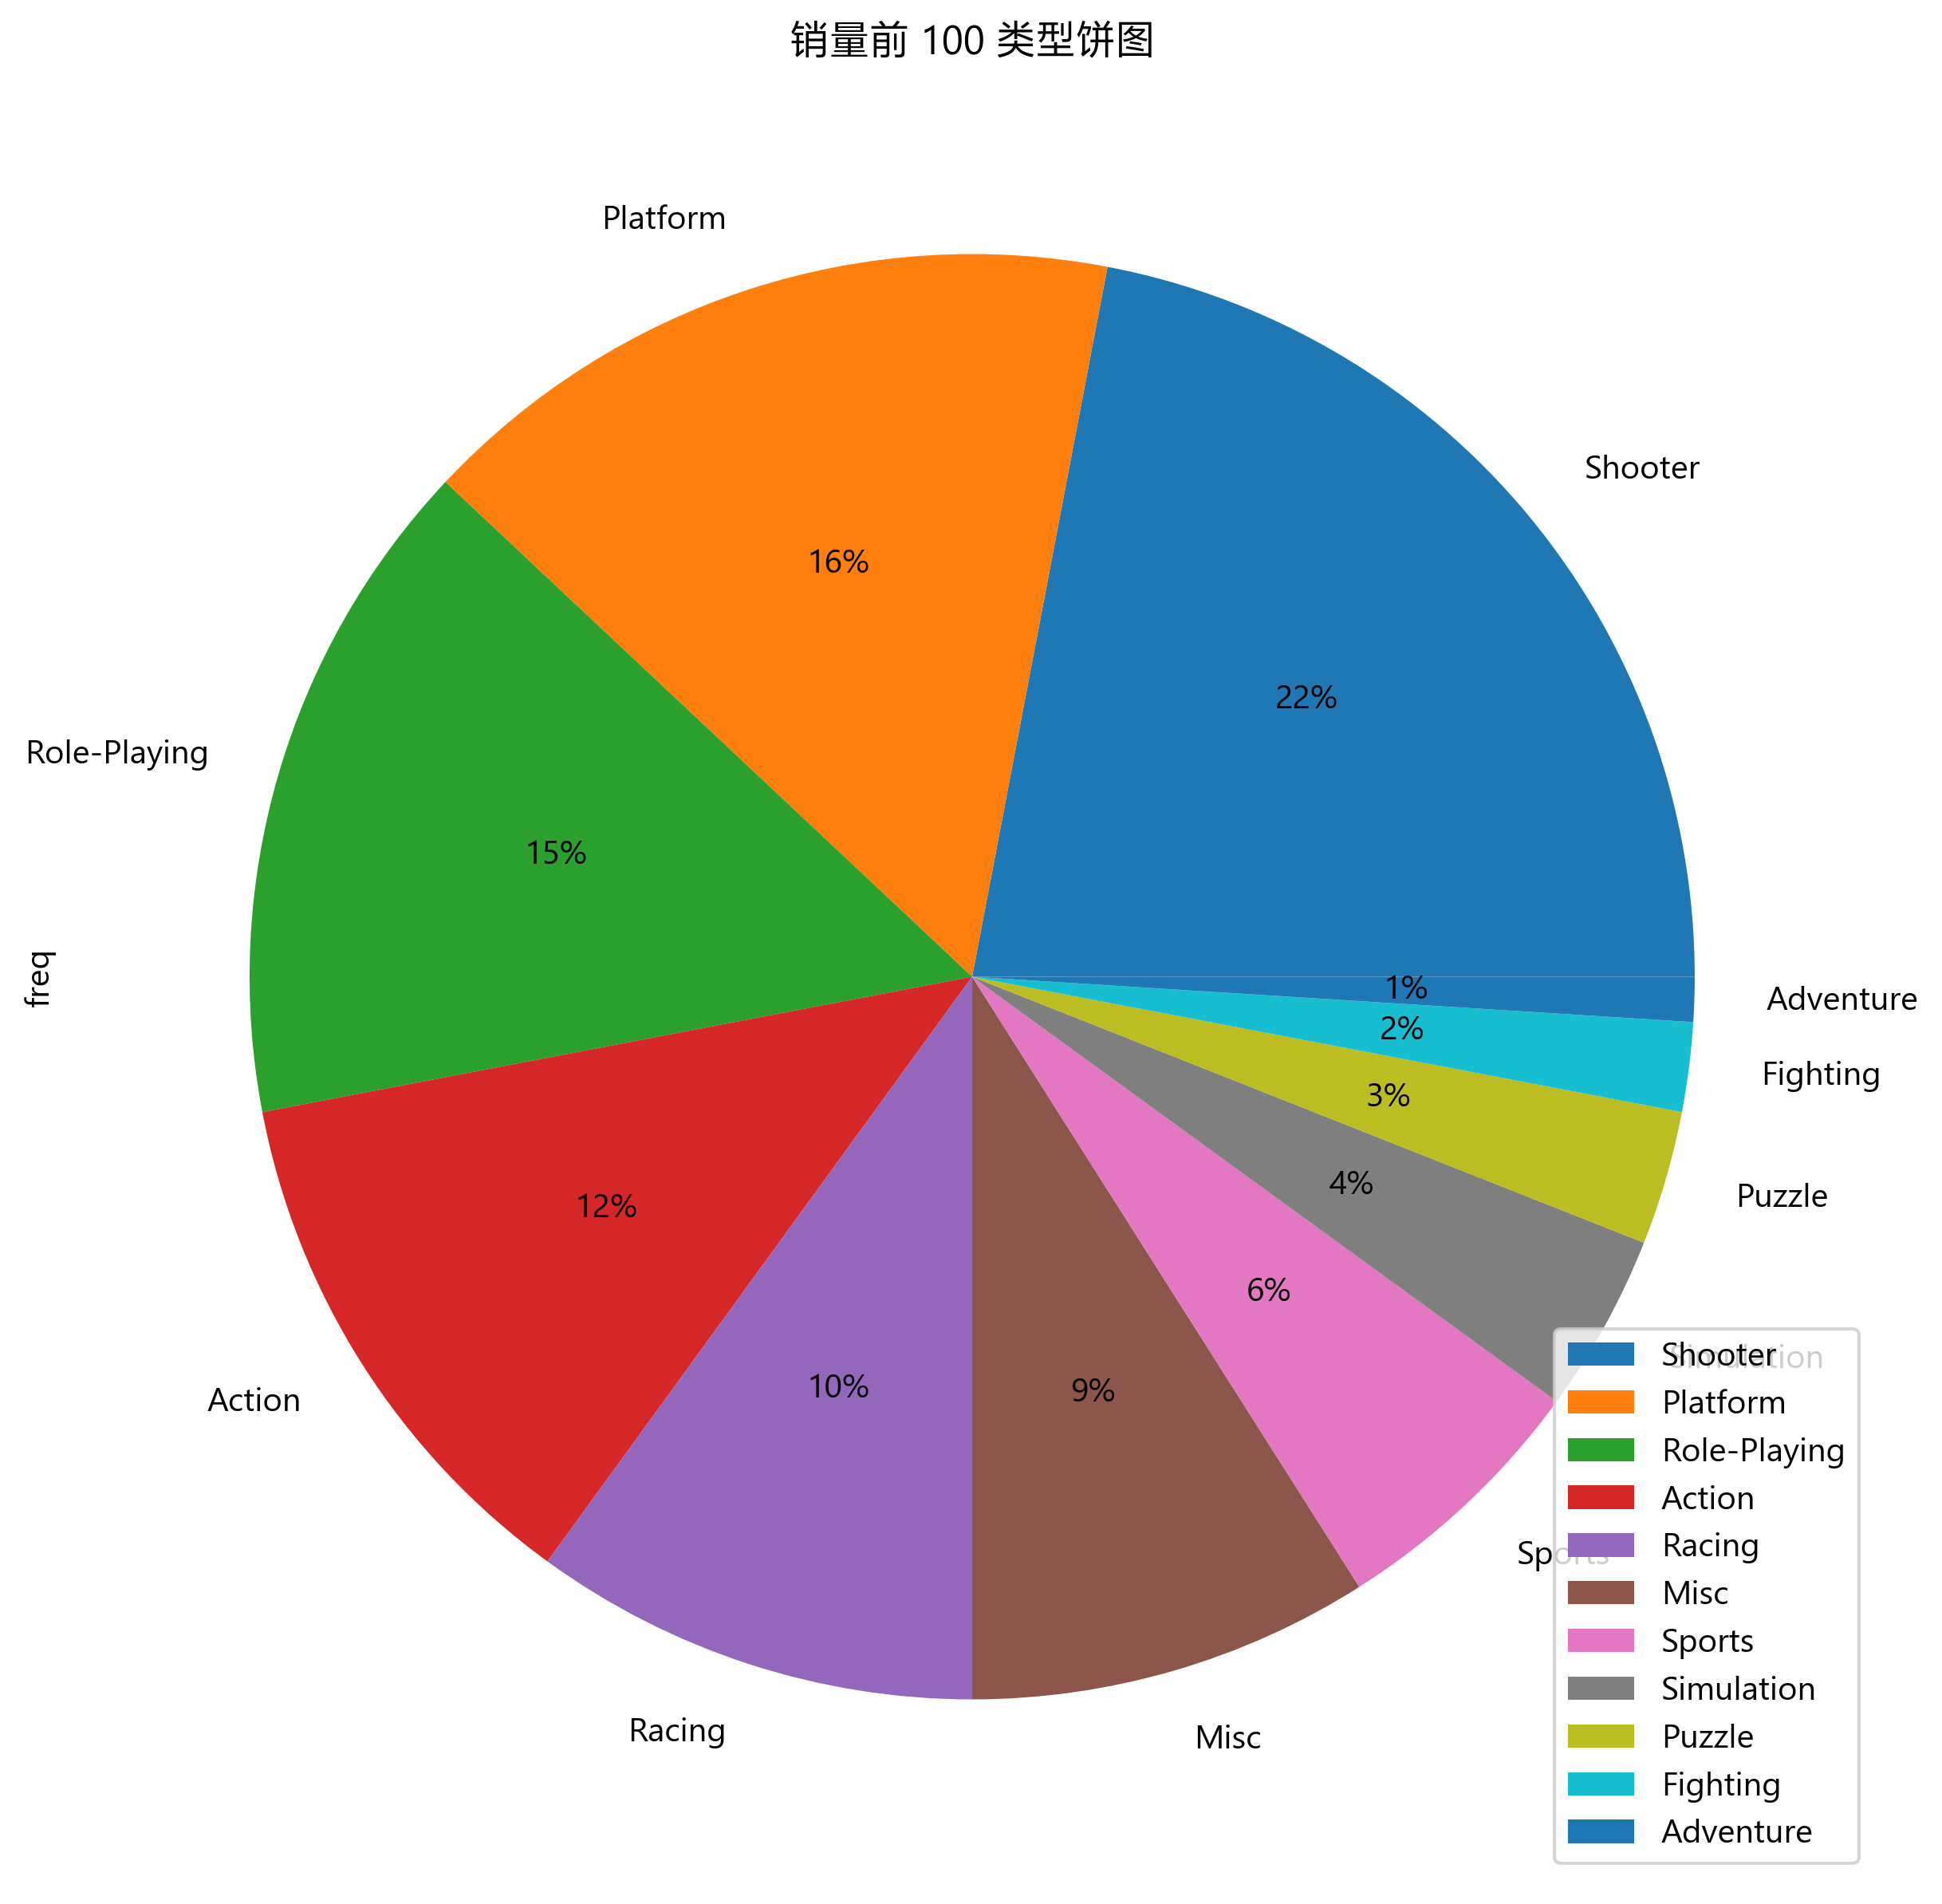

In [11]:
freq_genre_for_pie = pd.DataFrame({'freq': list(freq_genre.values())}, index = freq_genre.keys())
plot = freq_genre_for_pie.plot.pie(y = 'freq', figsize = (10, 10), title = '销量前 100 类型饼图', autopct='%1.0f%%')
plot.legend(loc = 'lower right')

统计平台的频数。

In [12]:
freq_platform, freq_platform_other = calc_freq(data_vgs_copy[:100], 'Platform')
# Sort the dict in reverse order and append the 'Other' part
freq_platform = collections.OrderedDict(sorted(freq_platform.items(), key = lambda it: it[1], reverse = True))
freq_platform['Other'] = freq_platform_other

In [13]:
print('销量前 100 平台：')
for entry in freq_platform.items():
    print(entry)

销量前 100 平台：
('X360', 16)
('Wii', 15)
('DS', 13)
('PS3', 9)
('3DS', 7)
('GB', 6)
('PS2', 6)
('PS4', 5)
('PS', 5)
('NES', 4)
('SNES', 4)
('N64', 4)
('GBA', 2)
('Other', 4)


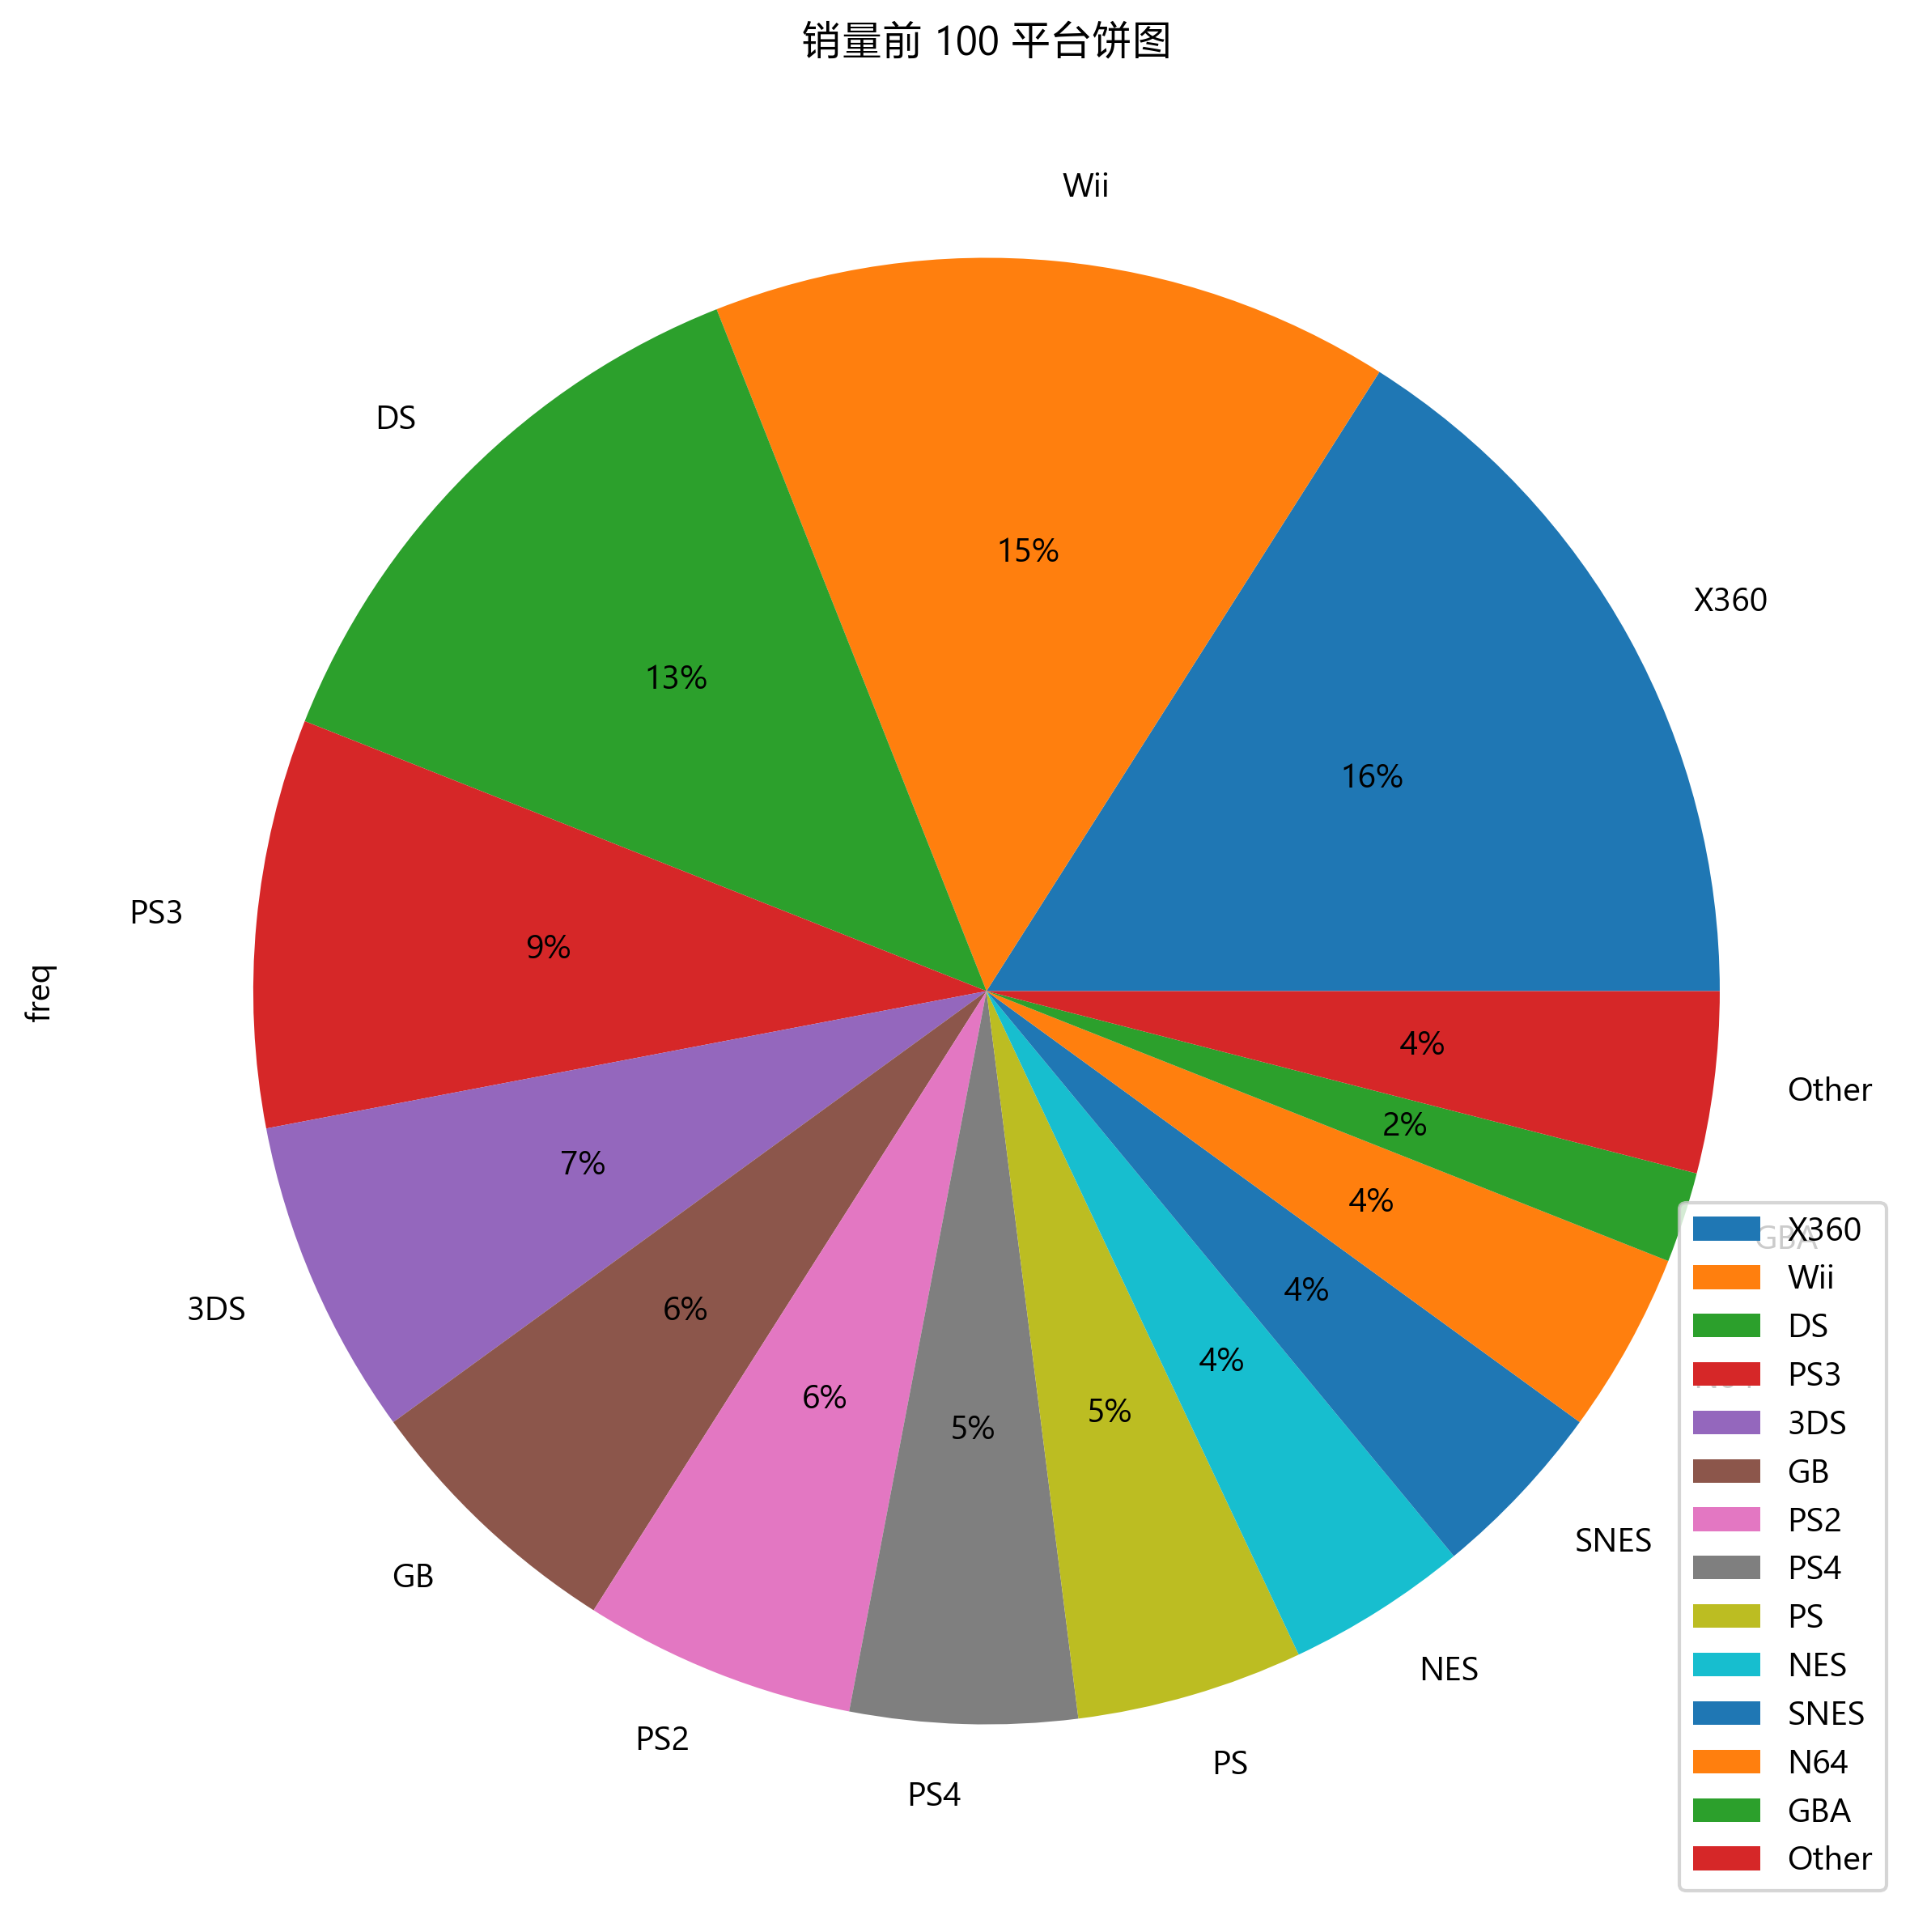

In [14]:
freq_platform_for_pie = pd.DataFrame({'freq': list(freq_platform.values())}, index = freq_platform.keys())
plot = freq_platform_for_pie.plot.pie(y = 'freq', figsize = (10, 10), title = '销量前 100 平台饼图', autopct='%1.0f%%')
plot.legend(loc = 'lower right')

统计发行商频数。

In [15]:
freq_publisher, freq_publisher_other = calc_freq(data_vgs_copy[:100], 'Publisher')
# Sort the dict in reverse order and append the 'Other' part
freq_publisher = collections.OrderedDict(sorted(freq_publisher.items(), key = lambda it: it[1], reverse = True))
freq_publisher['Other'] = freq_publisher_other

In [16]:
print('销量前 100 发行商：')
for entry in freq_publisher.items():
    print(entry)

销量前 100 发行商：
('Nintendo', 52)
('Activision', 14)
('Take-Two Interactive', 9)
('Sony Computer Entertainment', 8)
('Microsoft Game Studios', 6)
('Electronic Arts', 5)
('Ubisoft', 2)
('Other', 4)


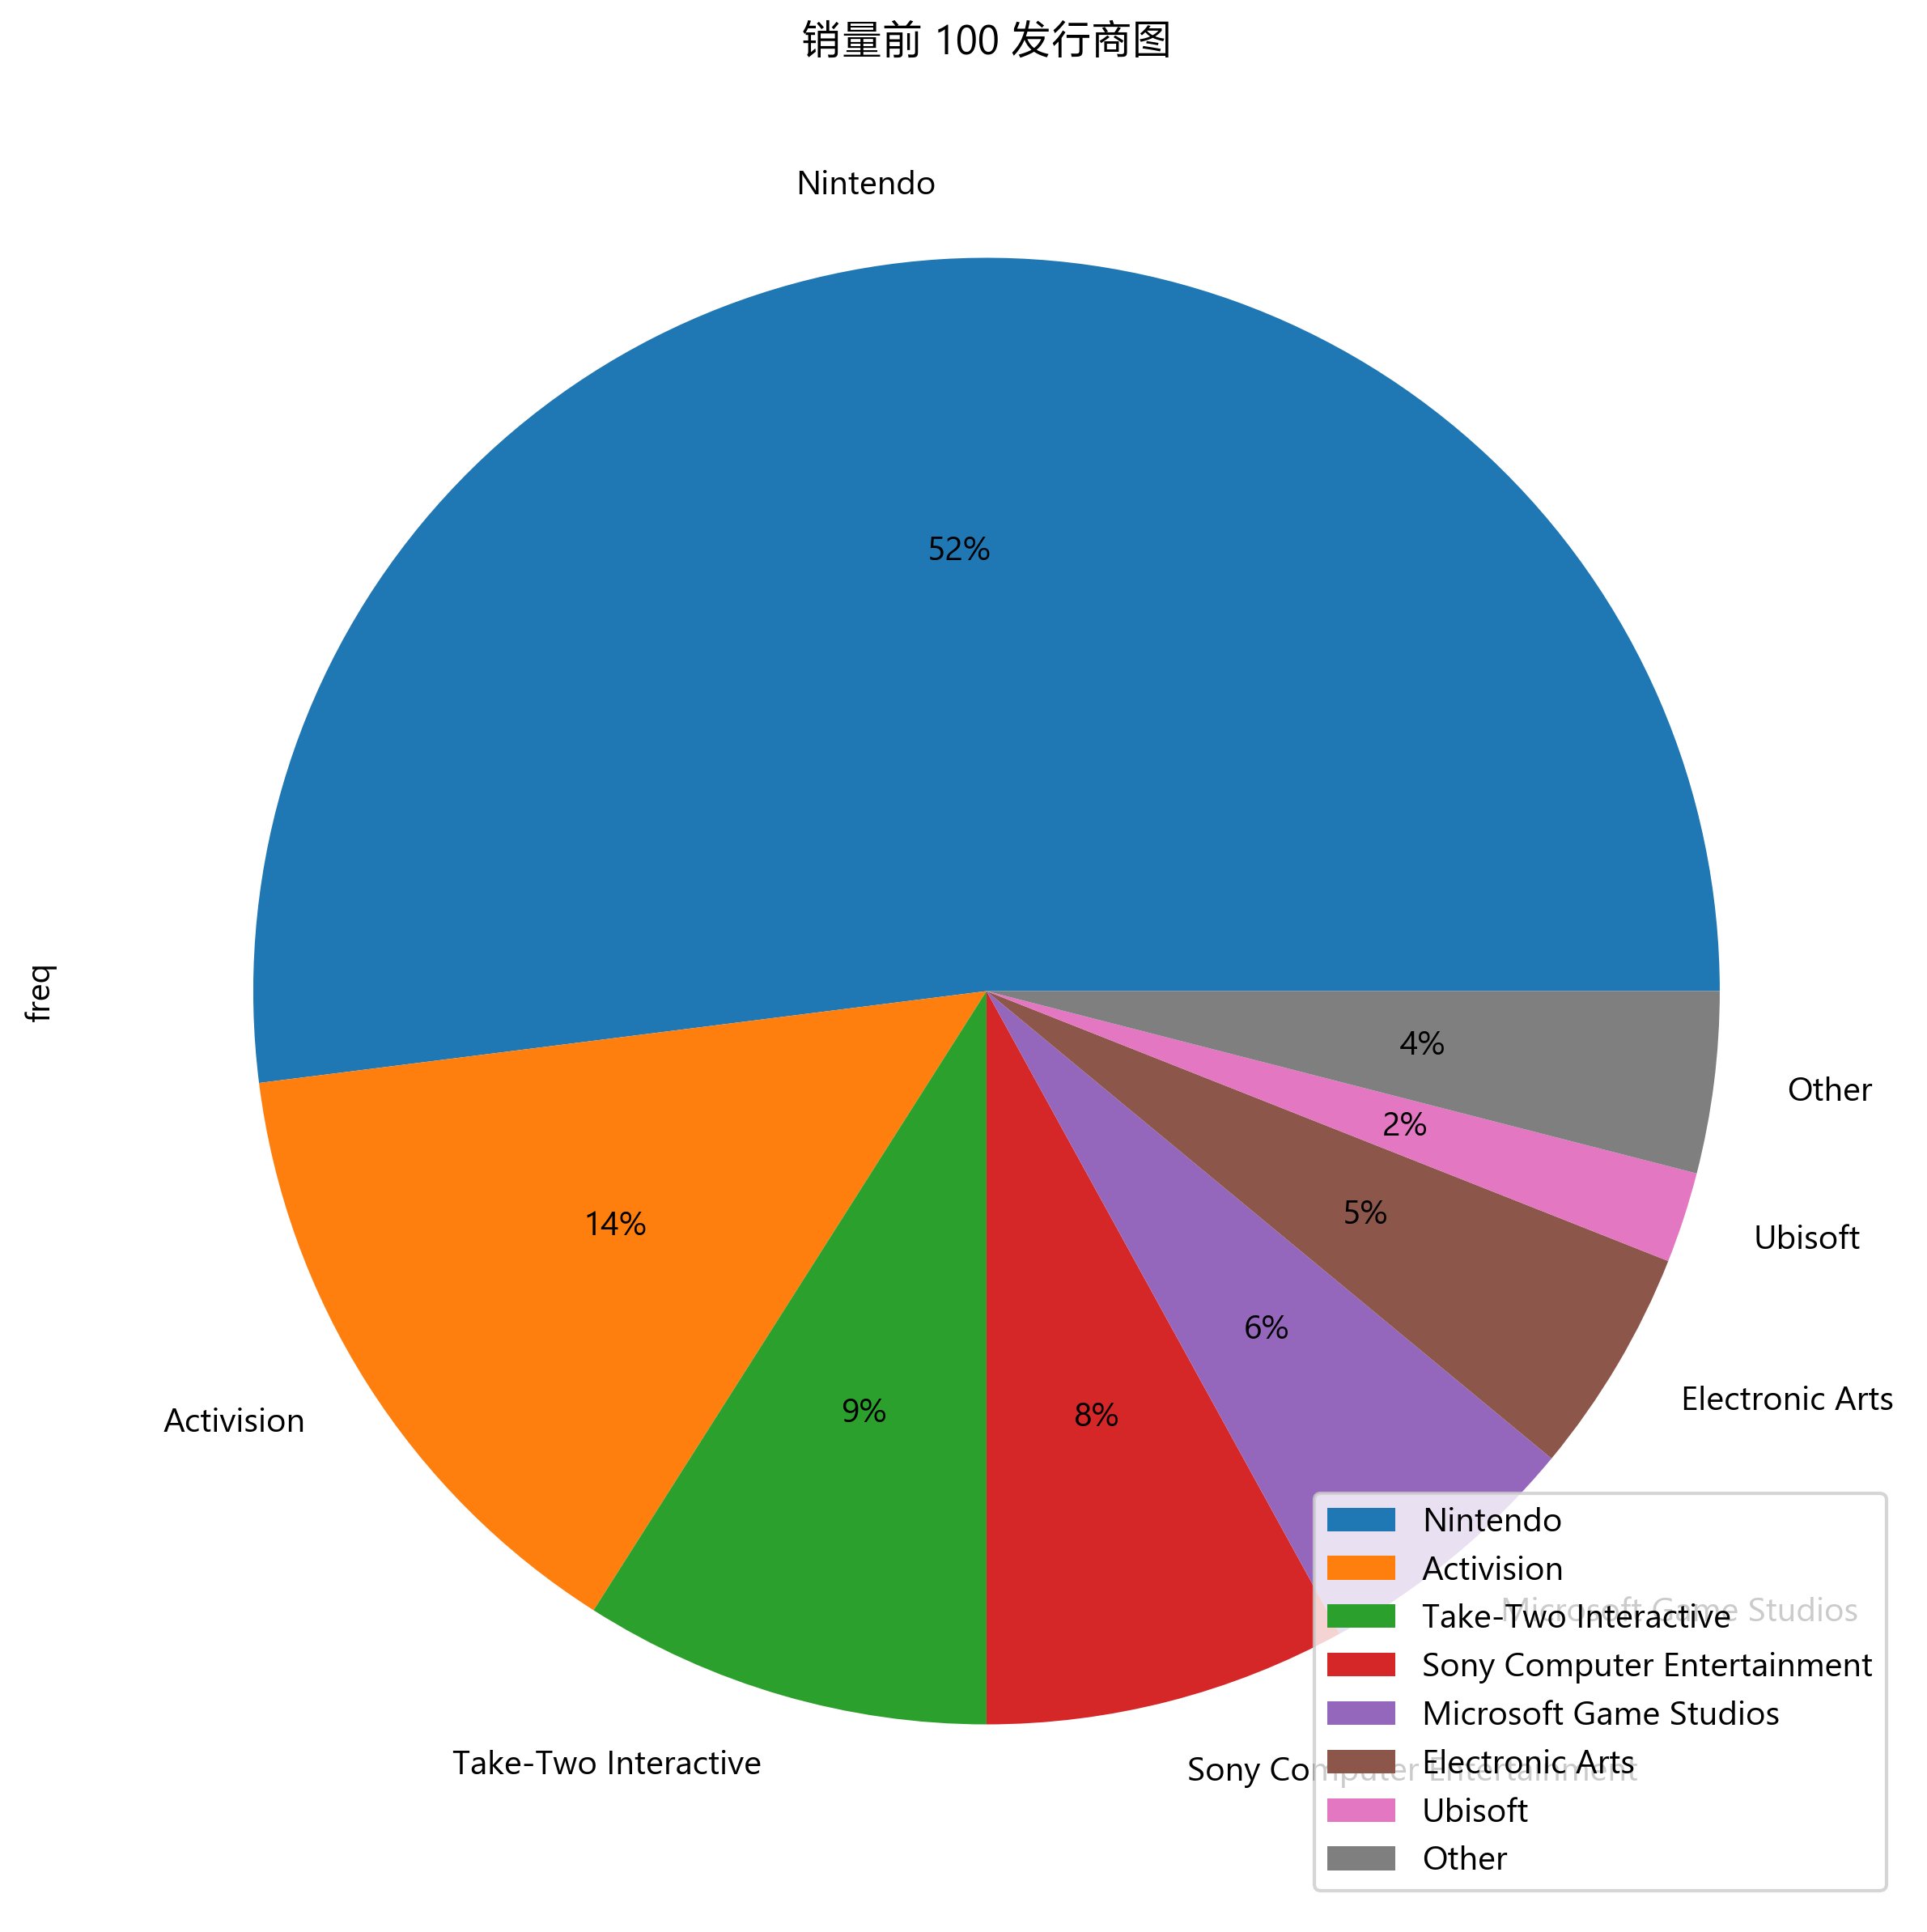

In [17]:
freq_publisher_for_pie = pd.DataFrame({'freq': list(freq_publisher.values())}, index = freq_publisher.keys())
plot = freq_publisher_for_pie.plot.pie(y = 'freq', figsize = (10, 10), title = '销量前 100 发行商图', autopct='%1.0f%%')
plot.legend(loc = 'lower right')

## 3. 预测销售额

数据集中每年的销售额如下：

In [18]:
data_vgs_sales = data_vgs[['Year', 'Global_Sales']].dropna()
data_vgs_sales = data_vgs_sales.groupby(by = ['Year']).sum().reset_index()
data_vgs_sales

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


可以看出，2016、2017 和 2020 这三年的数据较为异常，故在后续处理中将其去除，并纳入预测范围。

In [19]:
data_vgs_sales.drop(data_vgs_sales.tail(3).index, inplace = True)

使用线性回归预测。

In [20]:
x_train, x_test, y_train, y_test = train_test_split(np.array(data_vgs_sales['Year']), np.array(data_vgs_sales['Global_Sales']))

In [21]:
x_train = [[x] for x in x_train]
x_test = [[x] for x in x_test]
y_train = [[y] for y in y_train]
y_test = [[y] for y in y_test]

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_predict = model.predict(x_test)
test_accuracy = model.score(x_test, y_test)

In [24]:
print(test_accuracy)

0.6994457809138995


In [25]:
x_full = [[x] for x in list(data_vgs_sales['Year'])]
y_full = [[y] for y in list(data_vgs_sales['Global_Sales'])]
model = LinearRegression()
model.fit(x_full, y_full)
x_predict = [2016, 2017, 2018, 2019, 2020, 2021]
x_predict = [[x] for x in x_predict]
y_predict = model.predict(x_predict)

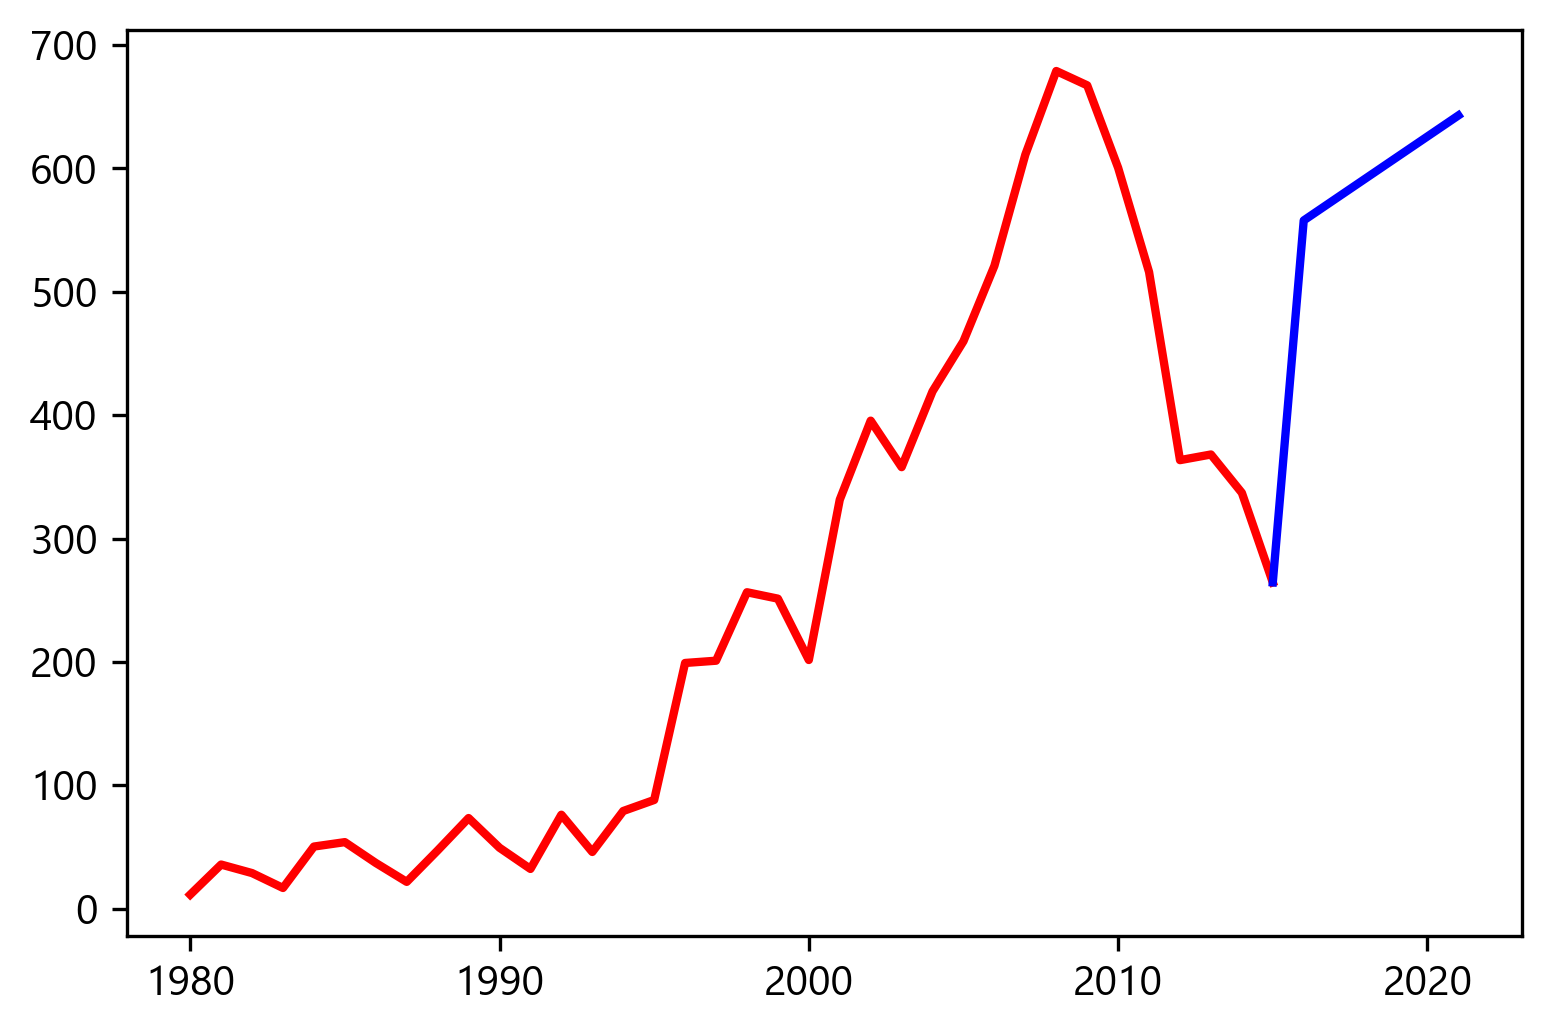

In [28]:
y_predict_for_plot = []
for i in range(len(x_full) - 1):
    y_predict_for_plot.append([float('NaN')])
y_predict_for_plot.append(y_full[-1])
for y in y_predict:
    y_predict_for_plot.append(list(y))
t = np.arange(len(x_full))
plt.figure()
plt.plot(x_full, y_full, 'r-', linewidth = 2, label = '真实值')
plt.plot(x_full + x_predict, y_predict_for_plot, 'b-', linewidth = 2, label = '预测值')

## 4. 总结

数据集包含了从 1980 年至 2017 年以有 2020 年的电子游戏销量。在销量前 100 的游戏中，频繁出现的游戏系列按出现次数从大到小分别有《Super Mario》《Call of Duty》《Pokemon》《Grand Theft Auto》《Gran Turismo》《Mario Kart》《Halo》《Final Fantasy》等，
游戏类型按销量排名分别是射击、平台、角色扮演、动作、竞速、综合、运动、模拟和解谜类等。
平台按销量排名分别为 X360、Wii、DS、PS3、3DS、GB、PS2、PS4、PS、NES、SNES、N64 等。
发行商按销量排名分别有 Nintendo、Activision、Take-Two Interactive、Sony Computer Entertainment、Microsoft Game Studios、Electronic Arts
 和 Ubisoft 等。

在销量方面，电子游戏的销量从 1980 年到 1995 年稳步提升，再一直到 2008 年取得飞速提升，再往后至 2016 年有一定回落，预计将在往后继续取得提升。